# 作业8：噪声的生成与检验  

### 作业目的：

    理解噪声的概率密度函数以及噪声类型的判定方法


### 作业内容：

    生成概率密度可用解析函数表示的噪声，检验生成的噪声与理论的契合程度。


### 作业要求：

    （1）用Numpy产生10000个均匀分布和高斯分布随机数，自行设定均匀分布的分布范围[a,b]，高斯分布的均值与方差

## 高斯分布
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

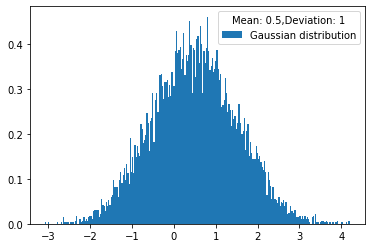

In [53]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0.5
sigma = 1
N = 10000
x = np.random.normal(mu,sigma,N)
n,bins,_= plt.hist(x,bins=256,density=True)

plt.legend(["Gaussian distribution"], title='Mean: 0.5,Deviation: 1')



<class 'numpy.ndarray'>


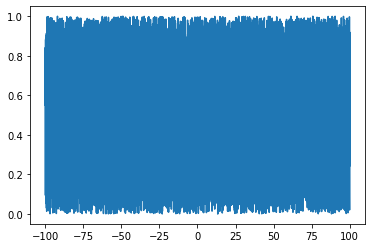

In [21]:
# a=-100,b=100
x = np.linspace(-100,100,10000)
y = np.random.uniform(size=10000)
plt.plot(x,y)

    （2）用matplotlib 中的hist函数统计生成噪声的概率密度函数，同时用numpy内置的mean、var函数计算两类噪声的均值与方差，与理论值进行比较。

均值差距:   0.00021390939422183397
方差差距:   0.00822010793713357


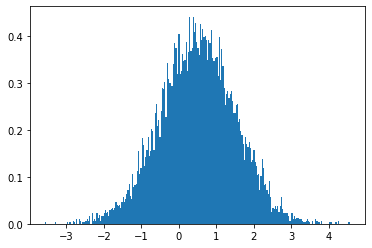

In [52]:
mu = 0.5
sigma = 1
N = 10000
#mean and standard deviation
x = np.random.normal(mu,sigma,N)
print('均值差距:  ',abs(mu - np.mean(x)) )
print('方差差距:  ',abs(sigma - np.var(x, ddof = 1)))
n,bins,_= plt.hist(x,bins=256,density=True)
y = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(bins-mu)**2/(2*sigma**2))
plt.show()

    （3）利用实际计算得到的均值与方差，根据理论公式绘制噪声的pdf曲线，并与实际曲线进行对比

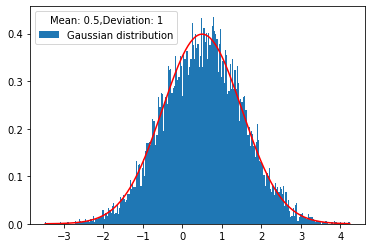

In [77]:
mu = 0.5
sigma = 1
N = 10000
x = np.random.normal(mu,sigma,N)
n,bins,_= plt.hist(x,bins=256,density=True)
y = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(bins-mu)**2/(2*sigma**2))

plt.legend(["Gaussian distribution"], title='Mean: 0.5,Deviation: 1')
plt.plot(bins,y,'r')

    （4）利用生成的10000点高斯噪声，计算其自相关，绘制自相关波形。

高斯白噪声这句话包含三个意思：（1）这个噪声它是一个随机信号；（2）”白“是指其功率谱是常数，这样， 它的自相关函数是狄拉克函数(冲激函数）

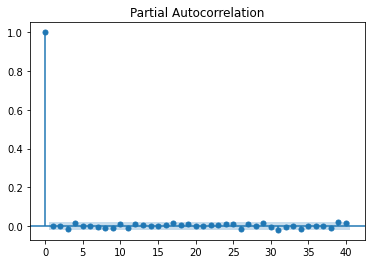

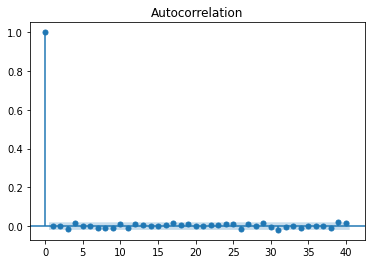

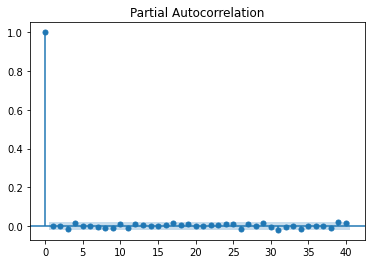

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
mu = 0.5
sigma = 1
N = 10000
x = np.random.normal(mu,sigma,N)

plot_acf(x)
plot_pacf(x)

    (5)  利用生成的10000点高斯噪声，计算其DFT变换，并绘DFT幅度波形。

(-499.95000000000005, 10498.95, -588.6043358576585, 5385.356666009761)

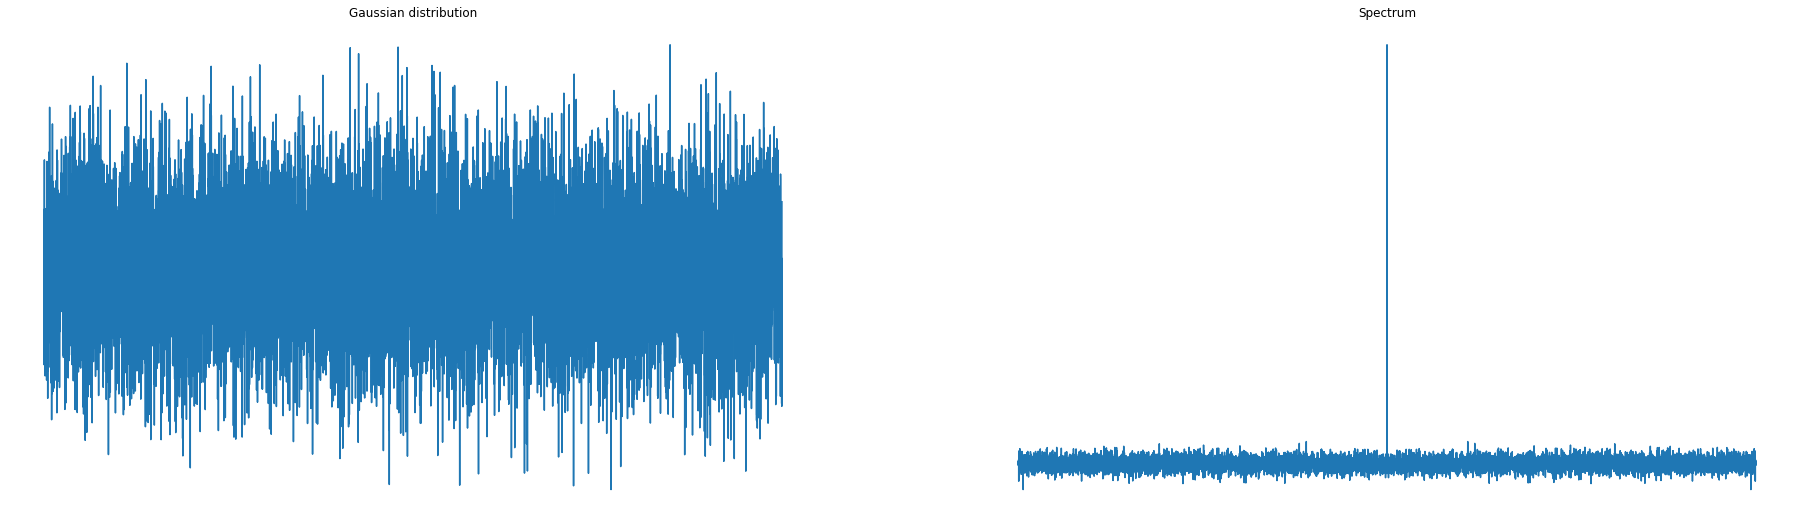

In [94]:
mu = 0.5
sigma = 1
N = 10000
x = np.random.normal(mu,sigma,N)

fft2_x = np.fft.fft(x)
shift_fft2_x = np.fft.fftshift(fft2_x)

plt.figure(figsize=(32,9))

plt.subplot(1,2,1)
plt.plot(x)
plt.title('Gaussian distribution')
plt.axis('off')
plt.subplot(1,2,2)
plt.plot(shift_fft2_x)
plt.title('Spectrum')
plt.axis('off')


### 提交要求：

    PDF格式文档，Pyton代码嵌入到文档中。